Kevin Boy Gunawan

## 1. Introduction

Background :

a bank companny need an insight within their customer behaviour regarding whether to provide loans to consumers. so they provide some data based on
person’s credit history and the result either customers are default or a good loans. so based on those data, our job is to conduct investigation and model making to help bank knowing well about their future customer before provide any loans to them.

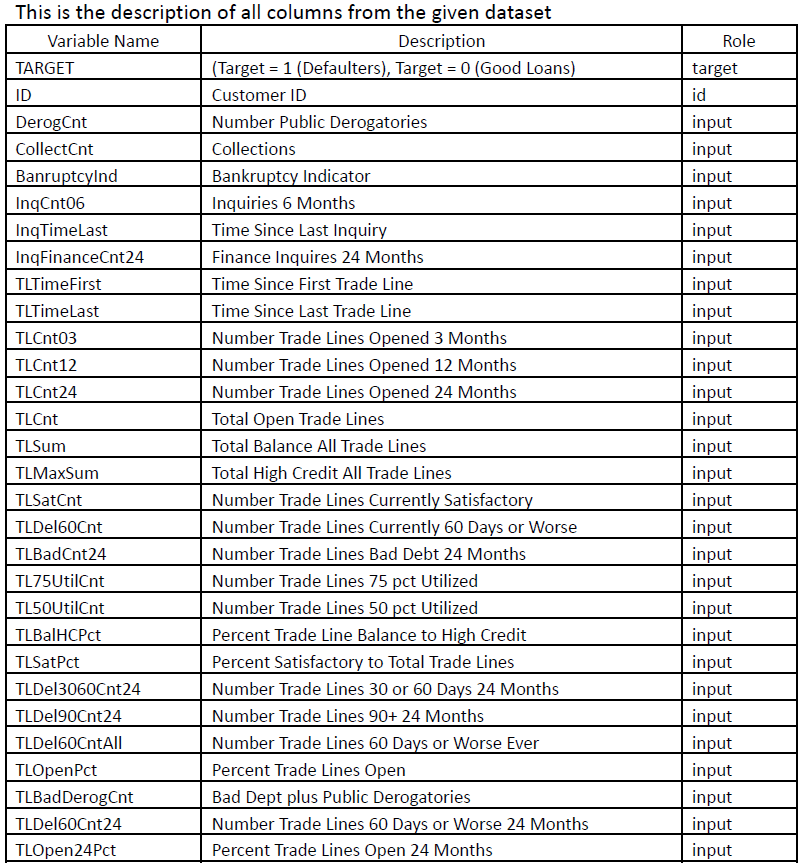

## 2. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier

from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import shap

import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [6]:
df = pd.read_excel('Dataset_CreditScoring.xlsx')

In [7]:
df_copy = df.copy()

In [8]:
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,582,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,662,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,805,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,1175,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,1373,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


## 4. Exploratory Data Analysis (EDA)

In [9]:
# check detail and info of data
desc = df.describe().T
desc['skewness'] = df.skew()
desc['miss_values'] = df.isnull().sum()
desc['Unique_values'] = [df[i].nunique() for i in df.columns]
desc['type'] =  df.dtypes
desc

,count,mean,std,min,25%,50%,75%,max,skewness,miss_values,Unique_values,type
TARGET,3000.0,0.166667,0.372740,0.0,0.0000,0.00000,0.00000,1.0000,1.789749,0,2,float64
ID,3000.0,62922.683667,37203.691912,66.0,30376.5000,62872.50000,96156.50000,126503.0000,0.014399,0,3000,int64
DerogCnt,3000.0,1.430000,2.731469,0.0,0.0000,0.00000,2.00000,51.0000,5.045122,0,26,float64
CollectCnt,3000.0,0.857000,2.161352,0.0,0.0000,0.00000,1.00000,50.0000,7.556541,0,24,float64
BanruptcyInd,3000.0,0.153333,0.360369,0.0,0.0000,0.00000,0.00000,1.0000,1.925240,0,2,float64
InqCnt06,3000.0,3.108333,3.479171,0.0,1.0000,2.00000,4.00000,40.0000,2.580016,0,30,float64
InqTimeLast,2812.0,3.108108,4.637831,0.0,1.0000,1.00000,3.00000,24.0000,2.386563,188,25,float64
InqFinanceCnt24,3000.0,3.555000,4.477536,0.0,1.0000,2.00000,5.00000,48.0000,2.806893,0,37,float64
TLTimeFirst,3000.0,170.113667,92.813700,6.0,106.0000,151.00000,227.00000,933.0000,1.031307,0,419,float64
TLTimeLast,3000.0,11.873667,16.321412,0.0,4.0000,7.00000,13.00000,342.0000,6.447907,0,97,float64


In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(3000, 30)

from the information above we can notice some valuable information about the dataset
* dataset have 3000 rows and 30 columns columns in total
* all columns are numeric types
* there are few of missing value on some columns
* there is no duplicated value
* there are some columns that contain high cardinality values such as ID, TLSum, TLMaxSum, TLBalHCPct
* based on statistic information on TARGET columns, we can say that the dataset is quite imbalance

**TARGET**

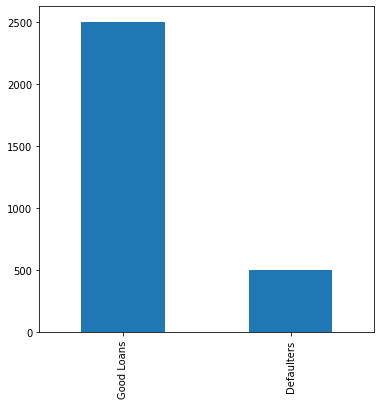

In [12]:
df.TARGET.map({0.0:'Good Loans', 1.0:'Defaulters'}).value_counts().plot.bar(figsize=(6,6));

based our earlier asumption, we can see the dataset is imbalance to specific class. in this case class 0 or good loan have higher frequency than class 1 or defaulters. its pretty common case and we can handle this situation by do some data sampling later on

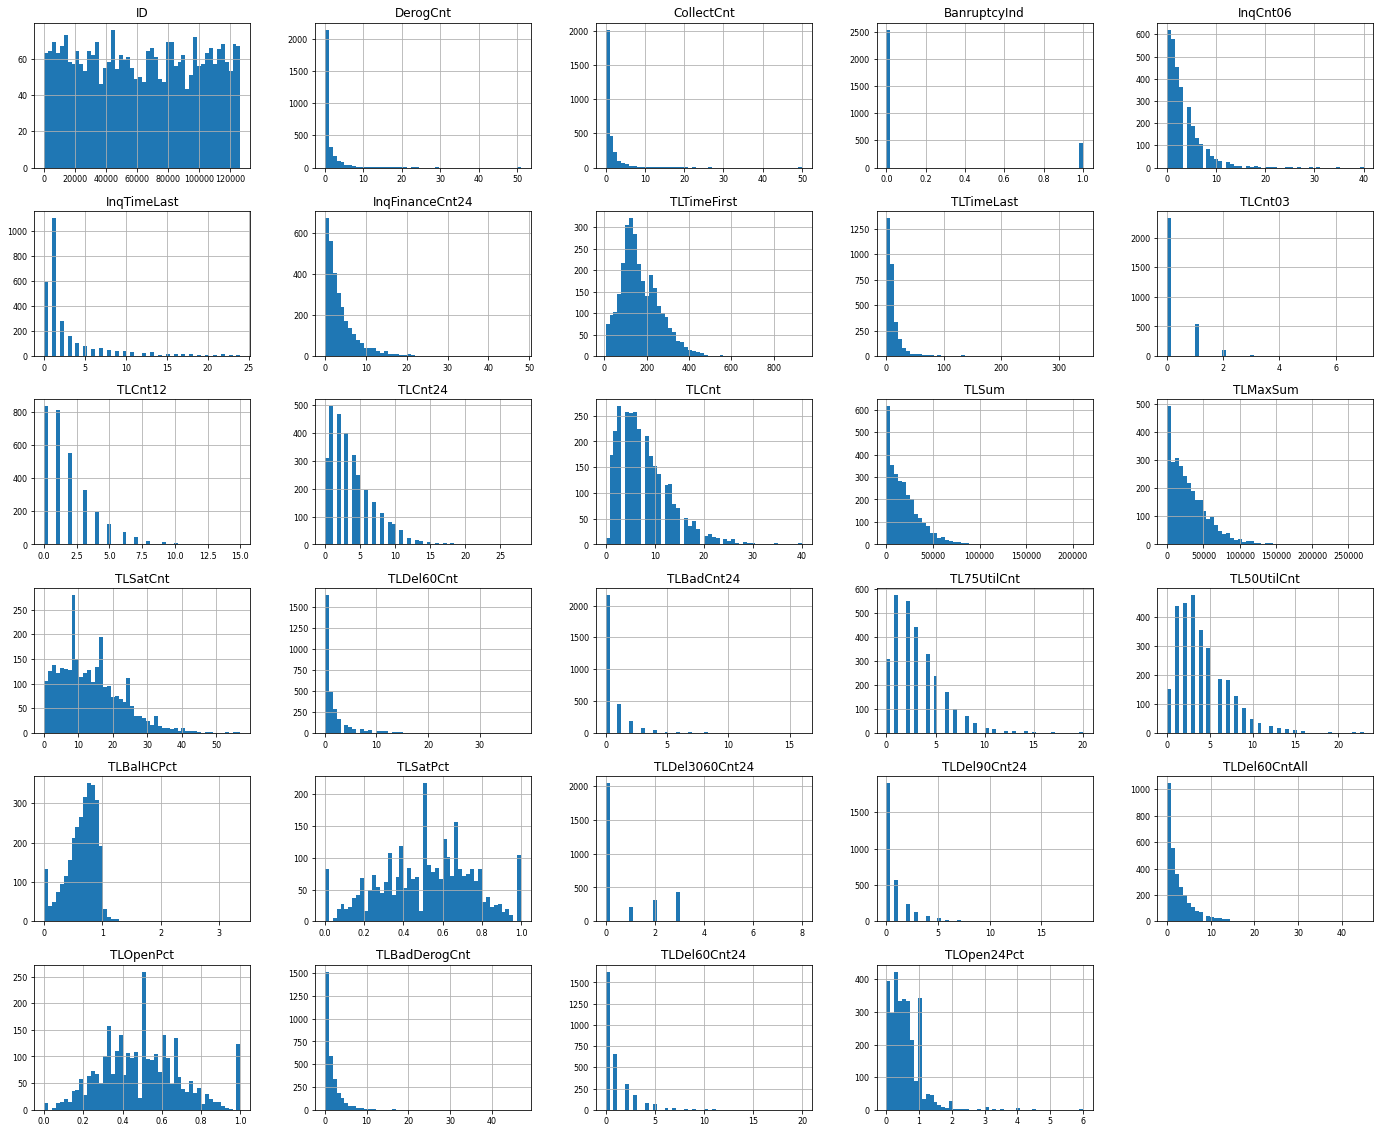

In [13]:
df.drop(columns=['TARGET']).hist(figsize=(24, 20), bins=50, xlabelsize=8, ylabelsize=8);

from histogram above we can say that, data are mostly skewed and contain lot of outliers. outliers and skewed data are nightmare for ML model, so we will handle them later by doing some outliers handling and transformation to reduce skewness

**Correlated Features**

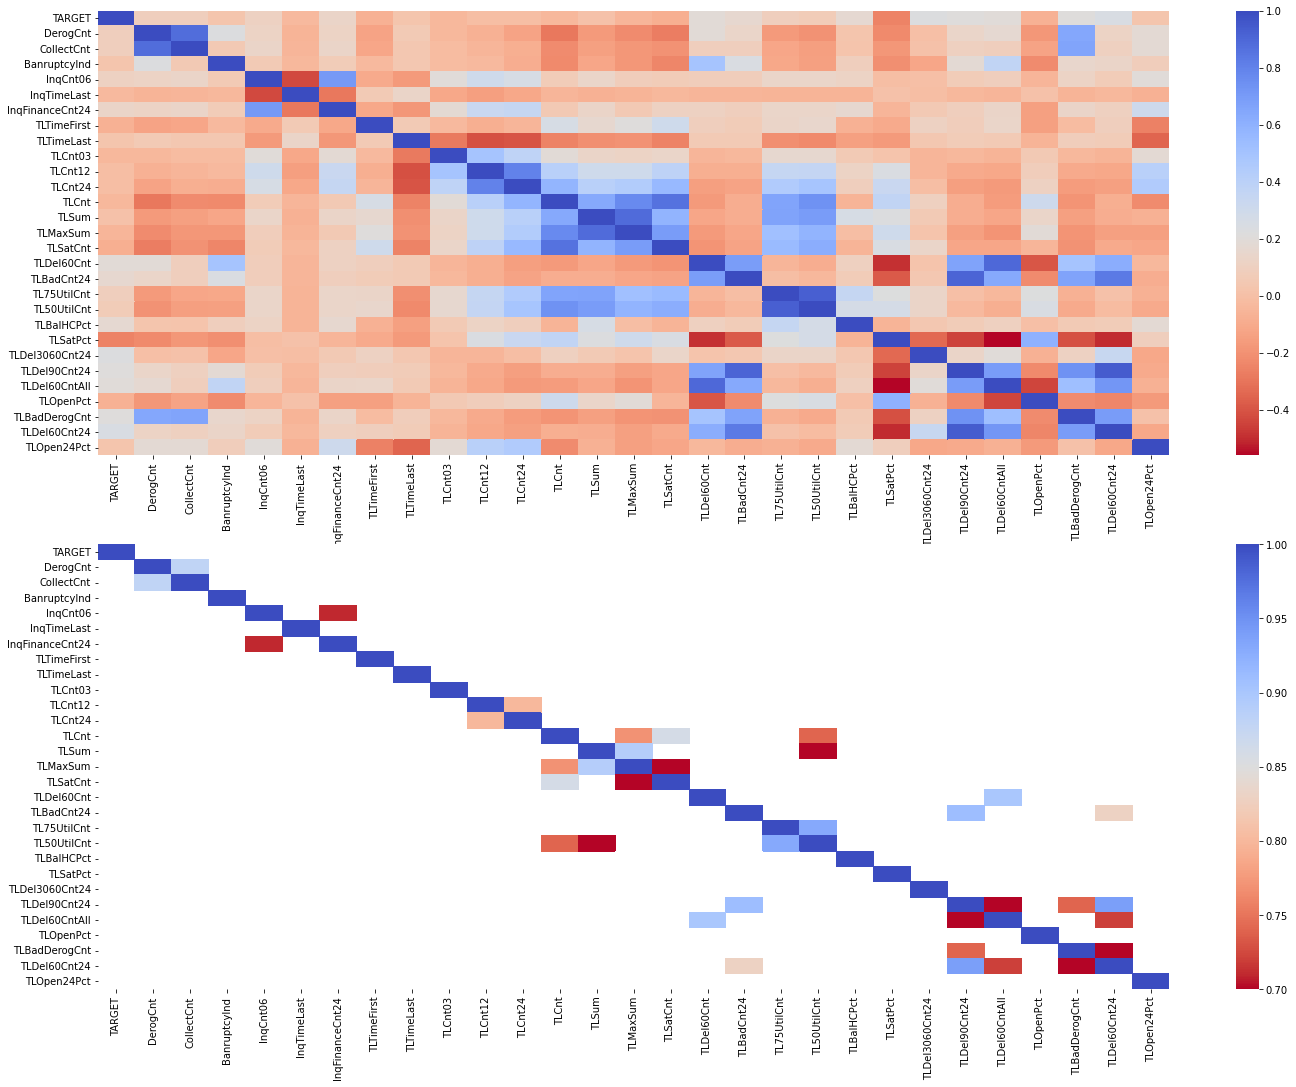

In [14]:
corr = df.drop(columns=['ID']).corr().round(2)
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1);
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2);

based on heatmap above, we can see that a lot of features seems to be correlated between each other. lets explore some of them.
* collumn CollectCnt and DerogCnt has strong postive correlation. its normal considering the more you make collections the higher chance derogatory item is considered to be negative, and typically indicates a serious delinquency or late payments.
* collumn TLCnt12 and TLCnt24 has strong postive correlation.
* collumn TLSum and TLMaxSum has strong postive correlation.
* collumn TLCnt and TLSatCnt has strong postive correlation.
* collumn TLDel60Cnt and TLDel60CntAll has strong postive correlation.
* collumn TLBadCnt24 has strong postive correlation with collumns TLDel90Cnt24 and TLDel60Cnt24.
* collumn TL50UtilCnt and TL75UtilCnt has strong postive correlation.
* collumn TLDel60Cnt and TLDel60CntAll has strong postive correlation.

we can drop one of feature from 2 features with high corelation, but let see wheter am i going to drop them or not

## 5. Data Preprocessing

### Train-Test Split

In [15]:
X = df.drop(columns='TARGET')
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Outliers Handling

In [16]:
def box_plot(data, ncols, nrows):
  fig, axe = plt.subplots(ncols,nrows, figsize=(ncols*5,nrows*3));
  axes = axe.flatten();
  for i,j in enumerate(data):
    sns.boxplot(data[j], ax=axes[i]);
    axes[i].set_title(j);
    axes[i].set_xlabel('');
  plt.subplots_adjust(hspace=0.4);
  plt.show();

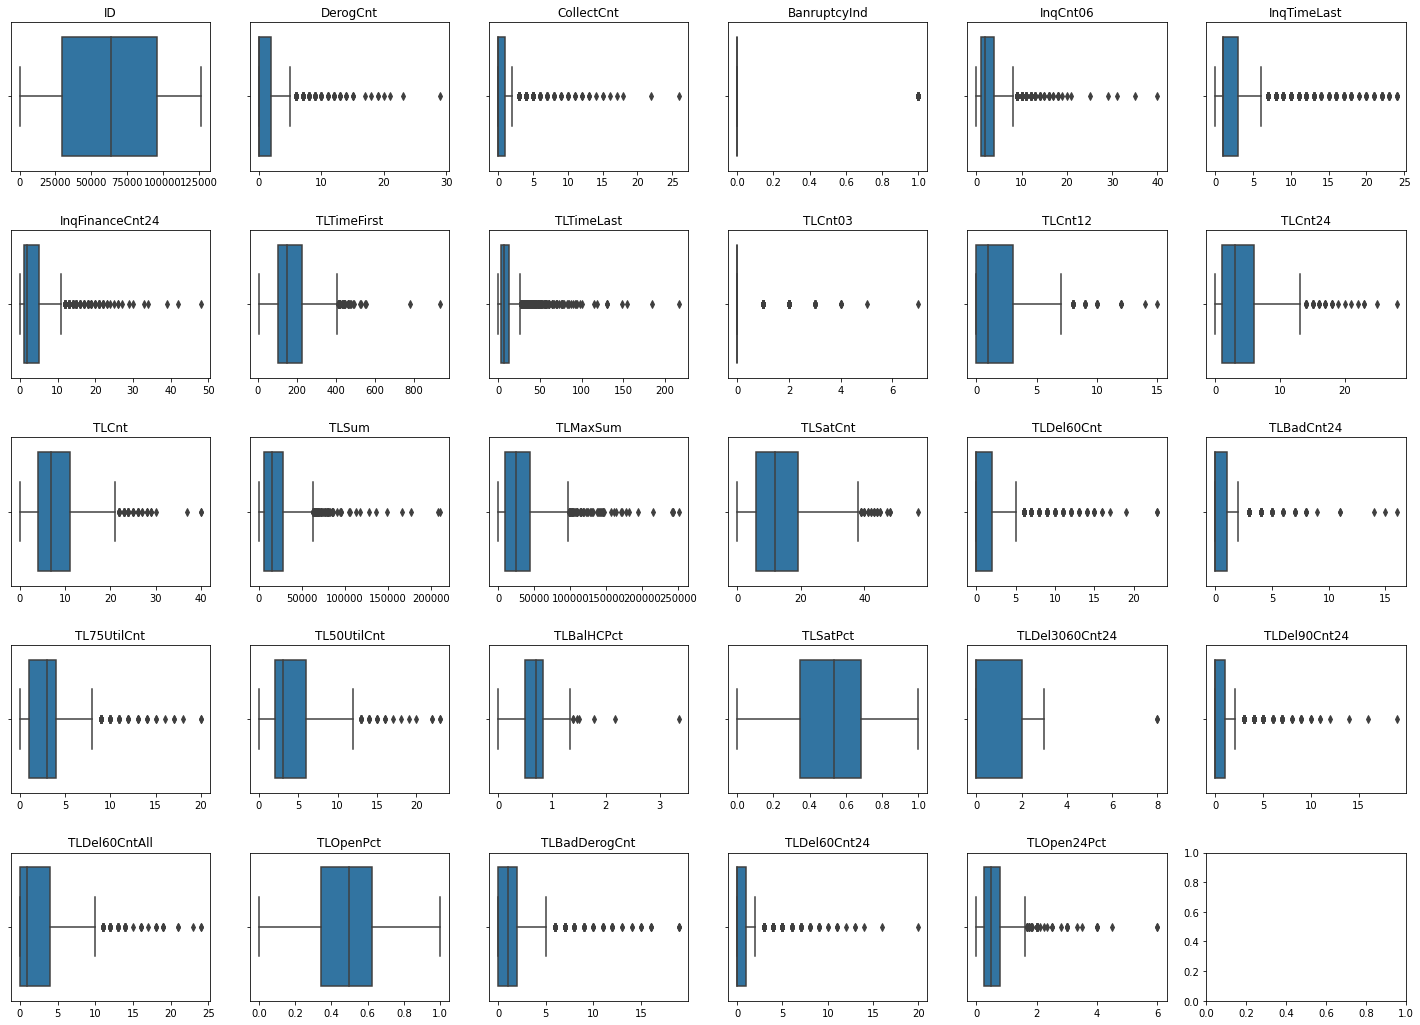

In [17]:
box_plot(X_train, ncols=5, nrows=6)

there are really lot of outliers in most of collumns.

to make everything looks organize and clean lets make a pipeline for the collumn dropper

In [18]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

lets drop some unnecesarry columns, in this case is ID column

In [19]:
drop_feat = ['ID']
drop_columns = make_pipeline(columnDropperTransformer(drop_feat))
X_train = drop_columns.fit_transform(X_train)

lets check the precentage of outliers on each collumns.

In [20]:
def outliers_percentage(datas, m):
    q3 = datas.quantile(0.75)
    q1 = datas.quantile(0.25)
    bb = q1 - (q3-q1)*m
    ba = q3 + (q3-q1)*m 
    outliers =  np.sum((datas < bb) |(datas > ba))
    tots = datas.count()
    return ((outliers/tots)*100).round(2)

In [21]:
col_low = [] # list of column with low outliers
col_hi = [] # list of column with hi outliers
for column in X_train.columns:
    datas = X_train[column]
    percent = round(outliers_percentage(datas, 1.5), 5)
    print(f'Outliers collumns "{column}": {percent}%')
    if percent < 5:
      col_low.append(column)
    else:
      col_hi.append(column)

Outliers collumns "DerogCnt": 5.81%
Outliers collumns "CollectCnt": 10.14%
Outliers collumns "BanruptcyInd": 15.14%
Outliers collumns "InqCnt06": 7.1%
Outliers collumns "InqTimeLast": 15.67%
Outliers collumns "InqFinanceCnt24": 6.0%
Outliers collumns "TLTimeFirst": 1.67%
Outliers collumns "TLTimeLast": 8.76%
Outliers collumns "TLCnt03": 21.86%
Outliers collumns "TLCnt12": 1.9%
Outliers collumns "TLCnt24": 1.67%
Outliers collumns "TLCnt": 2.48%
Outliers collumns "TLSum": 3.42%
Outliers collumns "TLMaxSum": 2.8%
Outliers collumns "TLSatCnt": 1.1%
Outliers collumns "TLDel60Cnt": 7.76%
Outliers collumns "TLBadCnt24": 6.05%
Outliers collumns "TL75UtilCnt": 3.55%
Outliers collumns "TL50UtilCnt": 1.53%
Outliers collumns "TLBalHCPct": 0.34%
Outliers collumns "TLSatPct": 0.0%
Outliers collumns "TLDel3060Cnt24": 0.1%
Outliers collumns "TLDel90Cnt24": 10.05%
Outliers collumns "TLDel60CntAll": 3.86%
Outliers collumns "TLOpenPct": 0.0%
Outliers collumns "TLBadDerogCnt": 5.52%
Outliers collumns "TLD

so heres our remaining collumn with listed outliers percentage on each. heres some decision i make regarding to handle outliers
* its seems like some collumns have lot of outliers for instance collumn TLCnt03 with outliers percentage 21.8 %. with this lot of outliers we cannot simply trim or winsorize them. we need to look further because its mean that there’s something interesting going on with the data. so for collumns that contain up to 5 % outliers we are not going to handle them rather just leave them the way it is.
* since we face with small amount of dataset we dont have any plan to drop any outliers or missing value. so for collumns that contain less than 5 % outliers we are going to winsorize and stack them to the lower or upper part of IQR.



In [22]:
print(col_low) #this is list of columns which contain < 5 % outliers

['TLTimeFirst', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TL75UtilCnt', 'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel60CntAll', 'TLOpenPct', 'TLOpen24Pct']


In [23]:
print(col_hi) #this is list of columns which contain > 5 % outliers

['DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06', 'InqTimeLast', 'InqFinanceCnt24', 'TLTimeLast', 'TLCnt03', 'TLDel60Cnt', 'TLBadCnt24', 'TLDel90Cnt24', 'TLBadDerogCnt', 'TLDel60Cnt24']


In [24]:
def winsorize(data, col_low=col_low):
  for i in col_low:
      datas = data[i]
      
      q3 = datas.quantile(0.75)
      q1 = datas.quantile(0.25)
      bb = q1 - (q3-q1)*1.5 
      ba = q3 + (q3-q1)*1.5
  
      # outliers = ((datas < bb) |(datas > ba))
      # X_train[i].loc[outliers] = datas.median();

      outliers1 = datas < bb
      data[i].loc[outliers1] = bb;
      outliers1 = datas > ba
      data[i].loc[outliers1] = ba;

In [25]:
winsorize(data=X_train)

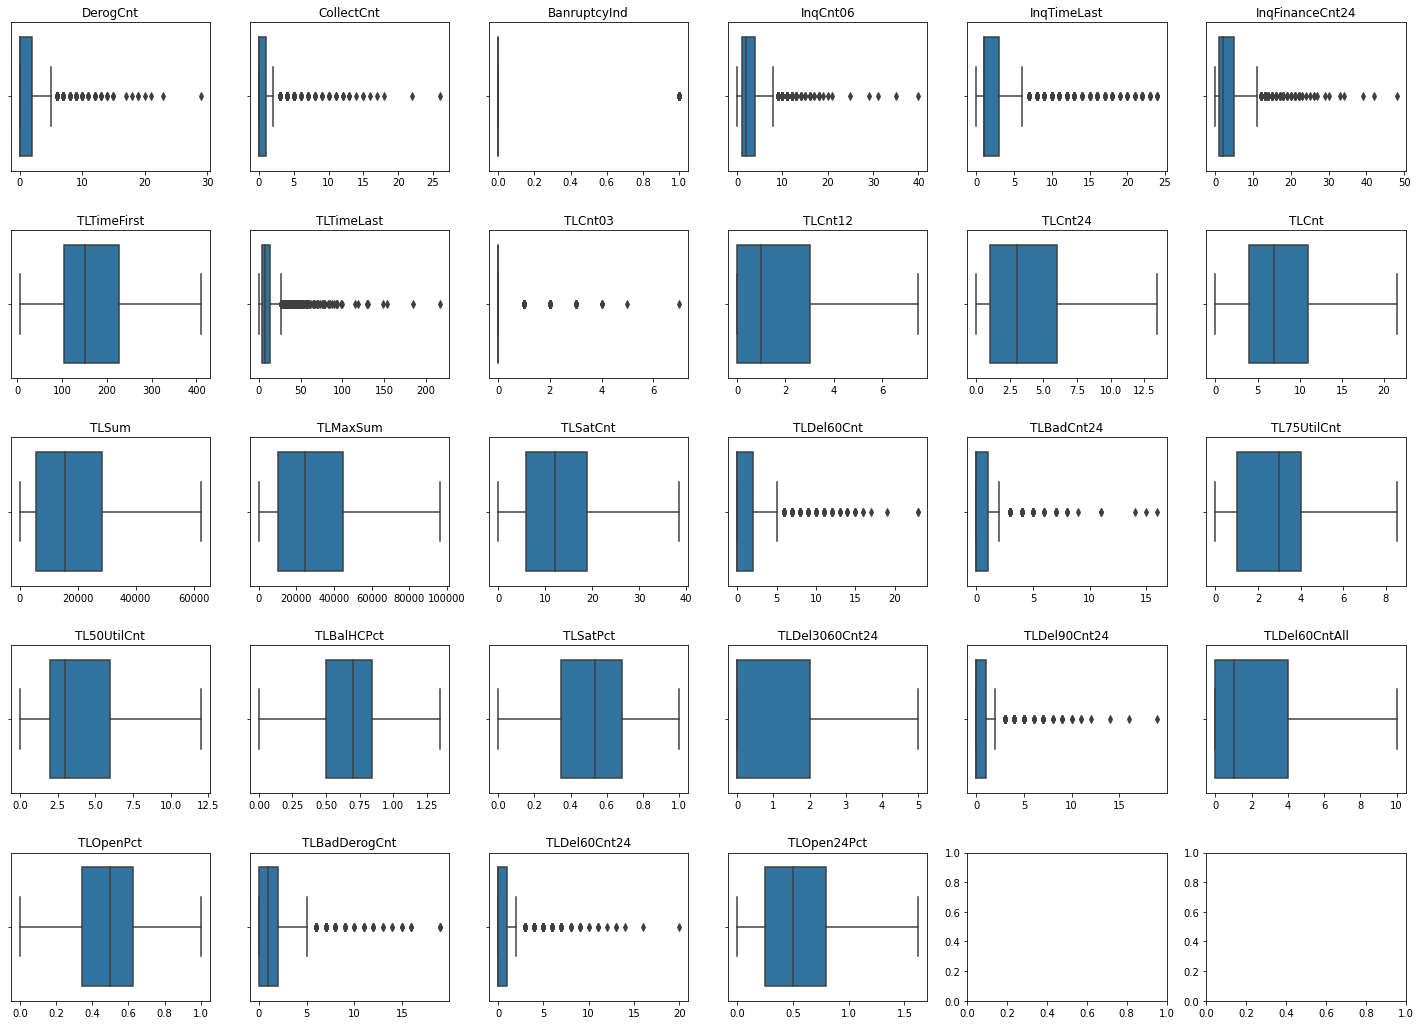

In [26]:
box_plot(X_train, ncols=5, nrows=6)

after perform a winsorizing we can see that several column now look quite normal without any outliers present. but some of them still look mess.

### Handling Missing Values

In [27]:
imputer = SimpleImputer(strategy='median')
X_train2 = imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train2, columns=X_train.columns)
X_train.isnull().sum()

DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

### Scalling

In [28]:
#scaling
power = PowerTransformer()
scaler = StandardScaler()
mmscaler = MinMaxScaler()
X_train = mmscaler.fit_transform(X_train)

In [29]:
data_pipeline = make_pipeline(drop_columns, imputer, mmscaler)

In [30]:
X_test = data_pipeline.transform(X_test)

### Handling Imbalance

to handle imbalance dataset, this project perform two sampling method which are random undersampling and SMOTETomek sampling. based on litearure, each of them have their own cons and pros which i will cover and exaplain on the very last section later.

#### - Random Undersampling

In [31]:
df.TARGET.value_counts()

0.0    2500
1.0     500
Name: TARGET, dtype: int64

In [32]:
defaulter = df.sample(frac=1)[df.TARGET == 0].head(500)
good_loan = df[df.TARGET == 1]

under_df = pd.concat([defaulter, good_loan]).sample(frac=1)

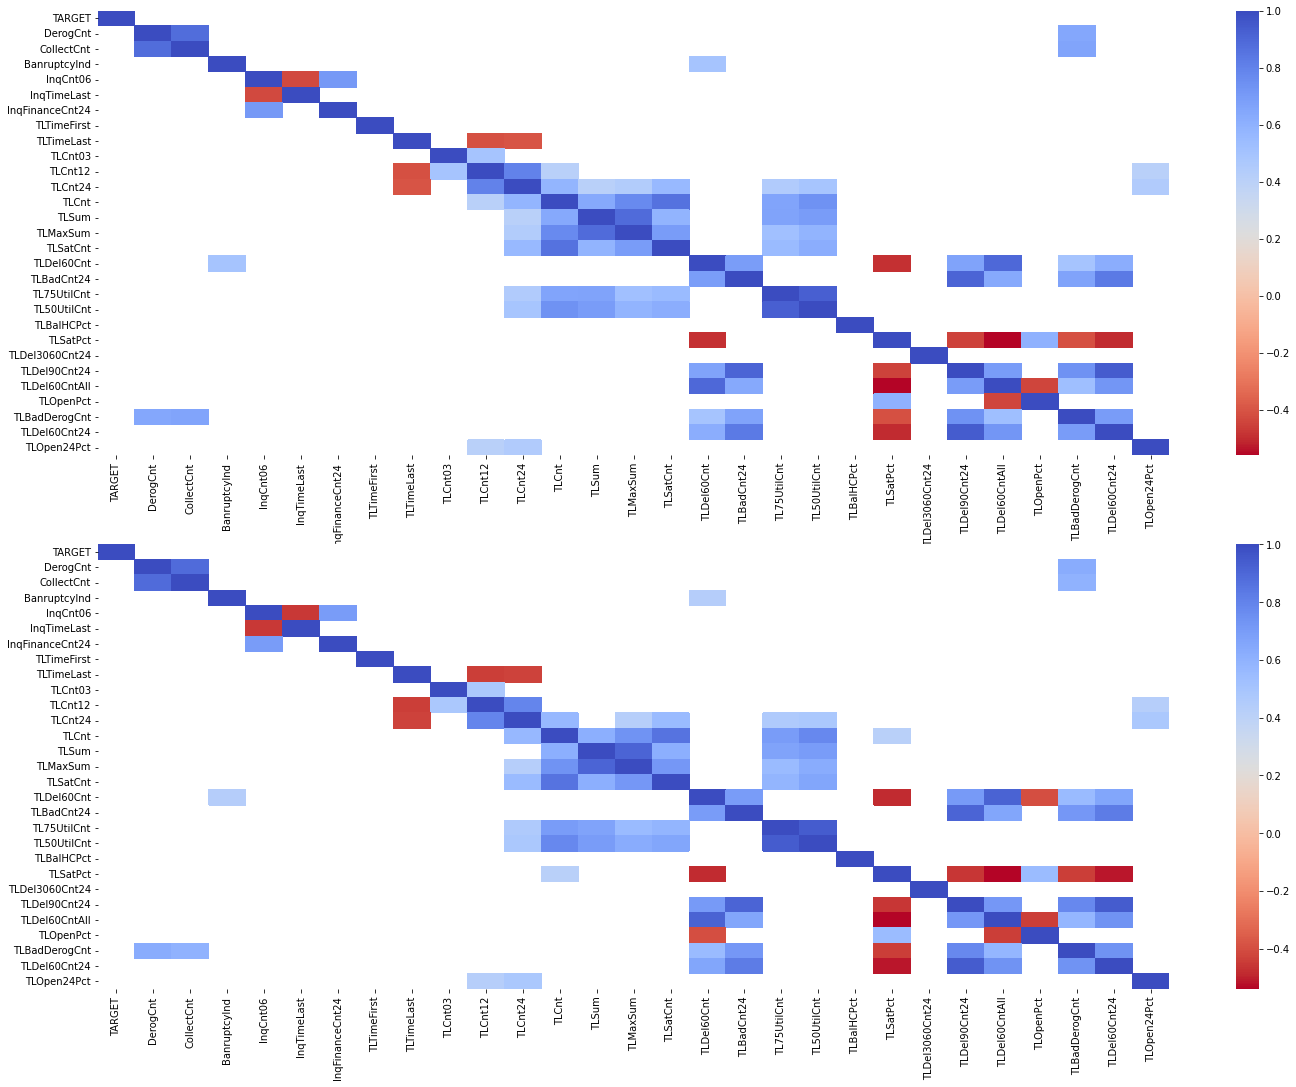

In [33]:
corr2 = under_df.drop(columns='ID').corr().round(2)
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,18))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1);
sns.heatmap(corr2[(corr2 >= 0.4) | (corr2 <= -0.4)], cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2);

after removing lot of dataset to perform undersampling, the correlation is still quite preserve

since we make a new dataframe based on undersampled of previous original dataset, we need to reprocess the data again.

In [34]:
X = under_df.drop(columns='TARGET')
y = under_df['TARGET']

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [35]:
y_train_under.value_counts()

1.0    350
0.0    350
Name: TARGET, dtype: int64

In [36]:
drop_columns2 = make_pipeline(columnDropperTransformer(drop_feat))
X_train_under = drop_columns2.fit_transform(X_train_under)

In [37]:
col_low = [] # list of column with low outliers
col_hi = [] # list of column with hi outliers
for column in X_train_under.columns:
    datas = X_train_under[column]
    percent = round(outliers_percentage(datas, 1.5), 5)
    if percent < 5:
      col_low.append(column)
    else:
      col_hi.append(column)

In [38]:
winsorize(data=X_train_under)

In [39]:
imputer2 = SimpleImputer(strategy='median')
X_train_under2 = imputer2.fit_transform(X_train_under)
X_train_under = pd.DataFrame(X_train_under2, columns=X_train_under.columns)

In [40]:
#scaling
mmscaler2 = MinMaxScaler()
X_train_under = mmscaler2.fit_transform(X_train_under)

In [41]:
data_pipeline2 = make_pipeline(drop_columns2, imputer2, mmscaler2)

In [42]:
X_test_under = data_pipeline2.transform(X_test_under)

#### - Synthetic Sampling using SMOTETomek (combine under & over)

In [48]:
smt = SMOTETomek()
X_train_smotet, y_train_smotet = smt.fit_resample(X_train, y_train)

y_train_smotet.value_counts()

0.0    1744
1.0    1744
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'PCA of original Data')

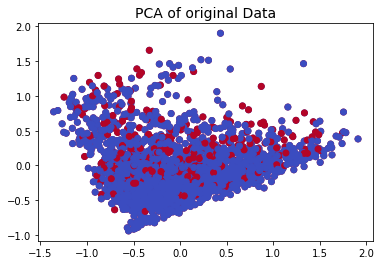

In [214]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X_train)

# PCA scatter plot
plt.scatter(X[:,0], X[:,1], c=(y_train == 0), cmap='coolwarm', label='Good Loans', linewidths=1)
plt.scatter(X[:,0], X[:,1], c=(y_train == 1), cmap='coolwarm', label='Defaulters', linewidths=1)
plt.title('PCA of original Data', fontsize=14)

Text(0.5, 1.0, 'PCA of feature using SMOTETomek ')

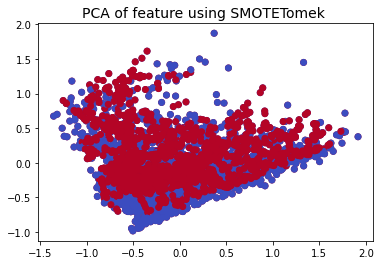

In [215]:
pca = PCA(n_components=2)
X = pca.fit_transform(X_train_smotet)

# PCA scatter plot
plt.scatter(X[:,0], X[:,1], c=(y_train_smotet == 0), cmap='coolwarm', label='Good Loans', linewidths=1)
plt.scatter(X[:,0], X[:,1], c=(y_train_smotet == 1), cmap='coolwarm', label='Defaulters', linewidths=1)
plt.title('PCA of feature using SMOTETomek ', fontsize=14)

## 6. Model Definition

In [51]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

In [52]:
balance_classifiers = {
    'BalancedRandomForestClassifier': BalancedRandomForestClassifier(),
    'RUSBoostClassifier': RUSBoostClassifier()
}

### 7. Model Training

**using undersampled dataset**

In [204]:
for key, classifier in classifiers.items():
    classifier.fit(X_train_under, y_train_under)
    training_score = cross_val_score(classifier, X_train_under, y_train_under, cv=10, scoring='recall_macro')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% recall weight with", 
          round(training_score.std(), 2), "std")

Classifiers:  LogisticRegression Has a training score of 69.0 % recall weight with 0.05 std
Classifiers:  KNeighborsClassifier Has a training score of 65.0 % recall weight with 0.04 std
Classifiers:  SVC Has a training score of 70.0 % recall weight with 0.04 std
Classifiers:  DecisionTreeClassifier Has a training score of 60.0 % recall weight with 0.03 std
Classifiers:  RandomForestClassifier Has a training score of 70.0 % recall weight with 0.05 std
Classifiers:  GradientBoostingClassifier Has a training score of 70.0 % recall weight with 0.05 std
Classifiers:  AdaBoostClassifier Has a training score of 68.0 % recall weight with 0.06 std


**using sampled dataset with SMOTETomek**

In [205]:
for key, classifier in classifiers.items():
    classifier.fit(X_train_smotet, y_train_smotet)
    training_score = cross_val_score(classifier, X_train_smotet, y_train_smotet, cv=10, scoring='recall_macro')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% recall weight with", 
          round(training_score.std(), 2), "std")

Classifiers:  LogisticRegression Has a training score of 72.0 % recall weight with 0.02 std
Classifiers:  KNeighborsClassifier Has a training score of 81.0 % recall weight with 0.02 std
Classifiers:  SVC Has a training score of 81.0 % recall weight with 0.02 std
Classifiers:  DecisionTreeClassifier Has a training score of 84.0 % recall weight with 0.08 std
Classifiers:  RandomForestClassifier Has a training score of 92.0 % recall weight with 0.07 std
Classifiers:  GradientBoostingClassifier Has a training score of 89.0 % recall weight with 0.12 std
Classifiers:  AdaBoostClassifier Has a training score of 85.0 % recall weight with 0.1 std


**Using Ensembled wih sampling classifier**

In [206]:
for key, classifier in balance_classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=10, scoring='recall_macro')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% recall weight with", 
          round(training_score.std(), 2), "std")

Classifiers:  BalancedRandomForestClassifier Has a training score of 71.0 % recall weight with 0.03 std
Classifiers:  RUSBoostClassifier Has a training score of 67.0 % recall weight with 0.04 std


## 8. Model Evaluation

### Best Picked Classifiers (random undersampling)

in this section we are using undersampled dataset. based on cross validation, logistic regression model is picked for further tuning.

In [56]:
lr_params = {"penalty": ['l1', 'l2'], 
               'C': [0.2, 0.4, 0.6, 0.8, 1.0],
               'solver': ['liblinear', 'saga']}
grid_lr = GridSearchCV(LogisticRegression(), lr_params)
grid_lr.fit(X_train_under, y_train_under)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [57]:
df_params = pd.DataFrame({'penalty': list(grid_lr.cv_results_['param_penalty'].data),
              'C': list(grid_lr.cv_results_['param_C'].data),
              'solver': list(grid_lr.cv_results_['param_solver'].data),
              'mean_score': list(grid_lr.cv_results_['mean_test_score']),
              'fit_time': list(grid_lr.cv_results_['mean_fit_time'])})
df_params

,penalty,C,solver,mean_score,fit_time
0,l1,0.2,liblinear,0.690000,0.003837
1,l1,0.2,saga,0.708571,0.008580
2,l2,0.2,liblinear,0.701429,0.002832
3,l2,0.2,saga,0.698571,0.005472
4,l1,0.4,liblinear,0.711429,0.004097
5,l1,0.4,saga,0.704286,0.016184
6,l2,0.4,liblinear,0.700000,0.002609
7,l2,0.4,saga,0.707143,0.006713
8,l1,0.6,liblinear,0.704286,0.004364
9,l1,0.6,saga,0.705714,0.017184


In [58]:
lr_best = grid_lr.best_estimator_
print(lr_best)

LogisticRegression(C=0.8, penalty='l1', solver='saga')


In [59]:
y_pred_test_rl = lr_best.predict(X_test_under)
print(classification_report(y_test_under, y_pred_test_rl))

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       150
         1.0       0.72      0.74      0.73       150

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



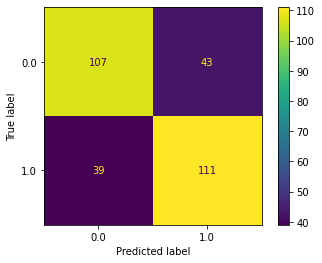

In [60]:
plot_confusion_matrix(lr_best, X_test_under, y_test_under)

with using undersampled dataset, our model resulting accuarcy 0.73. but in this case, accuarcy can be so tricky and we need to evaluate other metrics as well.

earlier i mention why accuarcy can be sto tricky, because There are two main problems in credit scoring: giving a loan to a bad borrower and refusing to a good one. both of them are the bad scenarios that could happen in business level so predicting both class equaly is important morever we face with imbalance dataset which model can be so bias to majority class.

### Best picked classifiers (SMOTETomek sampling)

in this section we are using MOTETomek sampled dataset. based on cross validation, random forest classifier model is picked for further tuning.

In [61]:
rfc_params = {"n_estimators": [50, 100, 150, 200, 250], 
               'criterion': ['gini', 'entropy', 'log_loss'],
               'min_samples_split': [2, 4, 6, 8, 10]}
grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params)
grid_rfc.fit(X_train_smotet, y_train_smotet)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [83]:
df_params = pd.DataFrame({'n_estimator': list(grid_rfc.cv_results_['param_n_estimators'].data),
              'criterion': list(grid_rfc.cv_results_['param_criterion'].data),
              'min_samples_split': list(grid_rfc.cv_results_['param_min_samples_split'].data),
              'mean_score': list(grid_rfc.cv_results_['mean_test_score']),
              'fit_time': list(grid_rfc.cv_results_['mean_fit_time'])})
df_params

,n_estimator,criterion,min_samples_split,mean_score,fit_time
0,50,gini,2,0.901686,0.352368
1,100,gini,2,0.909427,0.679861
2,150,gini,2,0.907705,1.253157
3,200,gini,2,0.910575,1.344295
4,250,gini,2,0.910285,1.680709
...,...,...,...,...,...
70,50,log_loss,10,NaN,0.021957
71,100,log_loss,10,NaN,0.041386
72,150,log_loss,10,NaN,0.063036
73,200,log_loss,10,NaN,0.079340


In [63]:
rfc_best = grid_rfc.best_estimator_
print(rfc_best)

RandomForestClassifier(criterion='entropy', n_estimators=150)


In [64]:
y_pred_test_rfc = rfc_best.predict(X_test)
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       750
         1.0       0.49      0.27      0.35       150

    accuracy                           0.83       900
   macro avg       0.68      0.61      0.63       900
weighted avg       0.80      0.83      0.81       900



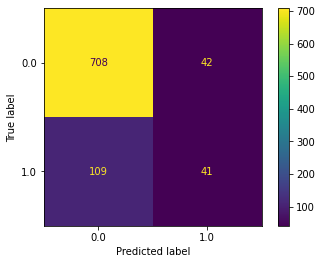

In [65]:
plot_confusion_matrix(rfc_best, X_test, y_test)

definitely overfit result. this is why i kinda have trust issue with tree based-model, its powerful but yet easy to overfit. so lets check using another classifier instead and logistic regression is picked.

In [66]:
lr_params2 = {"penalty": ['l1', 'l2'], 
               'C': [0.2, 0.4, 0.6, 0.8, 1.0],
               'solver': ['liblinear', 'saga']}
grid_lr2 = GridSearchCV(LogisticRegression(), lr_params2)
grid_lr2.fit(X_train_smotet, y_train_smotet)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [67]:
df_params = pd.DataFrame({'penalty': list(grid_lr2.cv_results_['param_penalty'].data),
              'C': list(grid_lr2.cv_results_['param_C'].data),
              'solver': list(grid_lr2.cv_results_['param_solver'].data),
              'mean_score': list(grid_lr2.cv_results_['mean_test_score']),
              'fit_time': list(grid_lr2.cv_results_['mean_fit_time'])})
df_params

,penalty,C,solver,mean_score,fit_time
0,l1,0.2,liblinear,0.720186,0.030557
1,l1,0.2,saga,0.719326,0.061840
2,l2,0.2,liblinear,0.721622,0.016152
3,l2,0.2,saga,0.721335,0.039149
4,l1,0.4,liblinear,0.718752,0.053329
5,l1,0.4,saga,0.718466,0.128014
6,l2,0.4,liblinear,0.723914,0.020807
7,l2,0.4,saga,0.723627,0.043788
8,l1,0.6,liblinear,0.718752,0.072371
9,l1,0.6,saga,0.717892,0.146848


In [68]:
lr_best2 = grid_lr2.best_estimator_
print(lr_best2)

LogisticRegression(C=0.4, solver='liblinear')


In [69]:
y_pred_test_rl2 = lr_best2.predict(X_test)
print(classification_report(y_test, y_pred_test_rl2))

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82       750
         1.0       0.35      0.69      0.46       150

    accuracy                           0.73       900
   macro avg       0.63      0.71      0.64       900
weighted avg       0.83      0.73      0.76       900



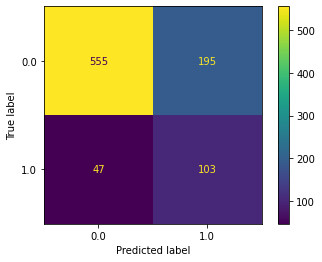

In [70]:
plot_confusion_matrix(lr_best2, X_test, y_test)

its quite good results but not as good as using undersampled dataset. the thing is precission for class 1 is very low. its mean that this model is susceptible to make false positive prediction, which mean its lead to falsy pedict the customer who not defaulter as defaulter more frequent.

### Ensembled with sampling Classifier 

**RUSBoostClassifier**

In [71]:
rusb_params = {"n_estimators": [10,30,50,80,100], 
               'algorithm': ['SAMME', 'SAMME.R'],
               'base_estimator': [DecisionTreeClassifier(), AdaBoostClassifier()]}
grid_rusb = GridSearchCV(RUSBoostClassifier(), rusb_params)
grid_rusb.fit(X_train, y_train)

GridSearchCV(estimator=RUSBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(),
                                            AdaBoostClassifier()],
                         'n_estimators': [10, 30, 50, 80, 100]})

In [72]:
df_params = pd.DataFrame({'n_estimator': list(grid_rusb.cv_results_['param_n_estimators'].data),
              'base_estimator': list(grid_rusb.cv_results_['param_base_estimator'].data),
              'param_algorithm': list(grid_rusb.cv_results_['param_algorithm'].data),
              'mean_score': list(grid_rusb.cv_results_['mean_test_score']),
              'fit_time': list(grid_rusb.cv_results_['mean_fit_time'])})
df_params

,n_estimator,base_estimator,param_algorithm,mean_score,fit_time
0,10,DecisionTreeClassifier(),SAMME,0.657143,0.112017
1,30,DecisionTreeClassifier(),SAMME,0.642381,0.199437
2,50,DecisionTreeClassifier(),SAMME,0.661905,0.146963
3,80,DecisionTreeClassifier(),SAMME,0.670000,0.216708
4,100,DecisionTreeClassifier(),SAMME,0.665714,0.214067
5,10,AdaBoostClassifier(),SAMME,0.700952,1.508905
6,30,AdaBoostClassifier(),SAMME,0.712857,2.554627
7,50,AdaBoostClassifier(),SAMME,0.710952,2.626897
8,80,AdaBoostClassifier(),SAMME,0.701429,2.120891
9,100,AdaBoostClassifier(),SAMME,0.696190,2.328211


In [73]:
rusb_best = grid_rusb.best_estimator_
print(rusb_best)

RUSBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)


In [74]:
y_pred_test_rusb = rusb_best.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred_test_rusb))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       750
         1.0       0.37      0.22      0.27       150

    accuracy                           0.81       900
   macro avg       0.61      0.57      0.58       900
weighted avg       0.77      0.81      0.79       900



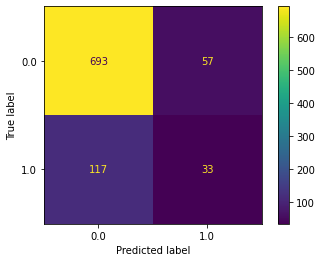

In [76]:
plot_confusion_matrix(rusb_best, X_test, y_test)

definitely overfit result.

**BalancedRandomForestClassifier**

In [77]:
brfc_params = {"n_estimators": [100,150,200,250,300], 
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2']}
grid_brfc = GridSearchCV(BalancedRandomForestClassifier(), brfc_params)
grid_brfc.fit(X_train, y_train)

GridSearchCV(estimator=BalancedRandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [78]:
df_params = pd.DataFrame({'n_estimator': list(grid_brfc.cv_results_['param_n_estimators'].data),
              'criterion': list(grid_brfc.cv_results_['param_criterion'].data),
              'max_features': list(grid_brfc.cv_results_['param_max_features'].data),
              'mean_score': list(grid_brfc.cv_results_['mean_test_score']),
              'fit_time': list(grid_brfc.cv_results_['mean_fit_time'])})
df_params

,n_estimator,criterion,max_features,mean_score,fit_time
0,100,gini,auto,0.693333,0.379045
1,150,gini,auto,0.695714,0.554486
2,200,gini,auto,0.690952,0.732477
3,250,gini,auto,0.683810,0.904792
4,300,gini,auto,0.693333,1.080970
5,100,gini,sqrt,0.697143,0.363547
6,150,gini,sqrt,0.690476,0.546172
7,200,gini,sqrt,0.686667,0.734017
8,250,gini,sqrt,0.683333,0.907305
9,300,gini,sqrt,0.693810,1.090988


In [79]:
brfc_best = grid_brfc.best_estimator_
print(brfc_best)

BalancedRandomForestClassifier(criterion='entropy', n_estimators=200)


In [80]:
y_pred_test_brfc = brfc_best.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred_test_brfc))

              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81       750
         1.0       0.33      0.71      0.45       150

    accuracy                           0.71       900
   macro avg       0.63      0.71      0.63       900
weighted avg       0.83      0.71      0.75       900



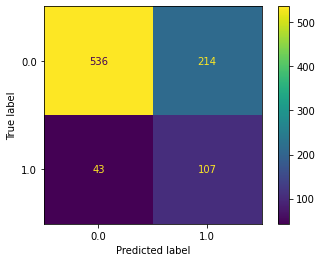

In [82]:
plot_confusion_matrix(brfc_best, X_test, y_test)

this model result is identic to the last model that used logistic linear. its quite good but yet the precission is still very low

## 9. Conclusion & Insight

to remind, for predicting the target/class i've already using several classifiers with doing some experiment to sampling the dataset.

based on what i've done heres 2 point you need to know,
* the best model can only reach accuracy 0.73 with f1 score 0.73. this model can predict class 0 and 1 equaly which is a good for business purposes so we can predict our action to giving a loan to a good borrower or refusing to a bad one more percisely. the bad news is, this model and metrics only able to achive on undersampled dataset which is not a good practice since we drop lot of rows and its high chance to lose lot of important information.
* the other best model which using Balanced Random Forest Classifier and logistic linear over SMOTETonek sampling. this two model resulting an identic result, a good accuracy and recall but poor precission. as we know that an ideal model for this kind of case should be resulting both, good recall and precision. its obvious that our ideal business scheme are giving a loan to a good borrower or refusing to a bad one. but this model only well perform at predicting bad customer whom tend to default, not a good one or we can simply say that this model frequently miss predict a good customer as a bad one. but if we think clearer its better to be suspicious or predict a good customer as bad one rather than predicting a bad customer as good one which can bring lot of loss to the business.

for business purposes mainly to predict credit scoring, its recommend to use the first best model since it able to make a good predicton both class equaly. but the accuracy still to predict the future customer behaviour is still doubtful since the dataset that use to train is shrink to the minority class. Another disadvantage of undersampling is that the sample of the majority class chosen could be biased. The sample might not accurately represent the real world, and the result of the analysis may be inaccurate.

but if the bussines strategi is to priotize to be super suspicious, its recomend to use second model. its train using all the dataset, its more reliable than undersample method, but for the trade off the perfomance can't be good as the first model.

**Feature Importance**

In [89]:
explainer = shap.KernelExplainer(brfc_best.predict_proba, shap.sample(X_train, 500))
shap_values = explainer.shap_values(shap.sample(X_test, 100))

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

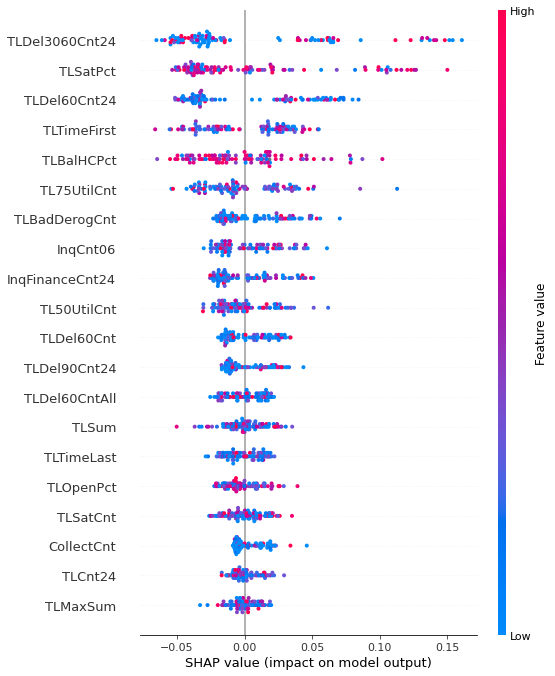

In [106]:
X1 = df.sample(frac=1)[df.TARGET == 0].drop(columns=['TARGET', 'ID']).sample(50)
X2 = df.sample(frac=1)[df.TARGET == 1].drop(columns=['TARGET', 'ID']).sample(50)
X = pd.concat([X1,X2])
shap.summary_plot(shap_values[1], X)

from model that i've been built, we can generate and find which feature that impactful to the outcome of target.
* it can be seen above that feature related to trade lines are mostly highly impactful to the outcomes. its common logic, tradelines are the main thing and containing vital information such as transaction.
* its hard to intepret since the classess are not quite separated or polarized. but atleast we can know which feature are highly effect the model.

## 10. Additional approach using neural network (experimental)

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

In [113]:
X_train_under.shape

(700, 28)

In [160]:
X_test_under.shape

(300, 28)

In [172]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_smotet, y_train_smotet)).shuffle(buffer_size=32).batch(16)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(buffer_size=32).batch(16)

In [193]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_smotet.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [194]:
from tensorflow.keras.optimizers import Adam, schedules, SGD
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [195]:
history = model.fit(train_dataset, epochs=150, validation_data=valid_dataset)

Epoch 1/150
218/218 [==============================] - 1s 3ms/step - loss: 0.7235 - accuracy: 0.4837 - val_loss: 0.6860 - val_accuracy: 0.6056
Epoch 2/150
218/218 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.4963 - val_loss: 0.6925 - val_accuracy: 0.6022
Epoch 3/150
218/218 [==============================] - 1s 3ms/step - loss: 0.7002 - accuracy: 0.5063 - val_loss: 0.6954 - val_accuracy: 0.5922
Epoch 4/150
218/218 [==============================] - 1s 3ms/step - loss: 0.7019 - accuracy: 0.4974 - val_loss: 0.6958 - val_accuracy: 0.5989
Epoch 5/150
218/218 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.5152 - val_loss: 0.6960 - val_accuracy: 0.6000
Epoch 6/150
218/218 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4977 - val_loss: 0.6962 - val_accuracy: 0.6067
Epoch 7/150
218/218 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5037 - val_loss: 0.6971 - val_accuracy: 0.5956

In [196]:
def report(feature, og):
  y_pred = model.predict(feature)
  y_pred = np.where(y_pred > 0.5, 1, 0)
  print(classification_report(og, y_pred))

In [197]:
def conf_mat(feature, og):
  y_pred = model.predict(feature)
  y_pred = np.where(y_pred > 0.5, 1, 0)
  print(confusion_matrix(og, y_pred))

In [198]:
#validation classification report
report(X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77       750
         1.0       0.30      0.74      0.43       150

    accuracy                           0.67       900
   macro avg       0.61      0.70      0.60       900
weighted avg       0.82      0.67      0.71       900



In [199]:
conf_mat(X_test, y_test)

[[491 259]
 [ 39 111]]
